<a href="https://colab.research.google.com/github/ChintPatel/CMPE258-HW2/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
import os
import datetime

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

None

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3143 - loss: 1.3829 - val_accuracy: 0.4950 - val_loss: 1.1890
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5450 - loss: 1.1233 - val_accuracy: 0.6375 - val_loss: 0.9106
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6867 - loss: 0.8264 - val_accuracy: 0.7675 - val_loss: 0.6720
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8175 - loss: 0.5870 - val_accuracy: 0.8350 - val_loss: 0.5212
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8819 - loss: 0.4529 - val_accuracy: 0.8725 - val_loss: 0.4175
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9252 - loss: 0.3657 - val_accuracy: 0.8925 - val_loss: 0.3458
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9364 - loss: 0.2992 - val_accuracy: 0.8950 - val_loss: 0.3041
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9455 - loss: 0.2541 - val_accuracy: 0.8925 - val_l

,precision,recall,f1-score,support
0,0.931373,0.9500,0.940594,100.0000
1,0.905263,0.8600,0.882051,100.0000
2,0.909091,0.9000,0.904523,100.0000
3,0.942308,0.9800,0.960784,100.0000
accuracy,0.922500,0.9225,0.922500,0.9225
macro avg,0.922009,0.9225,0.921988,400.0000
weighted avg,0.922009,0.9225,0.921988,400.0000


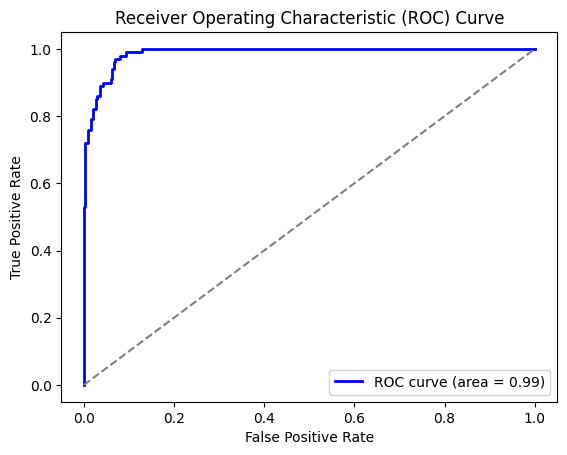

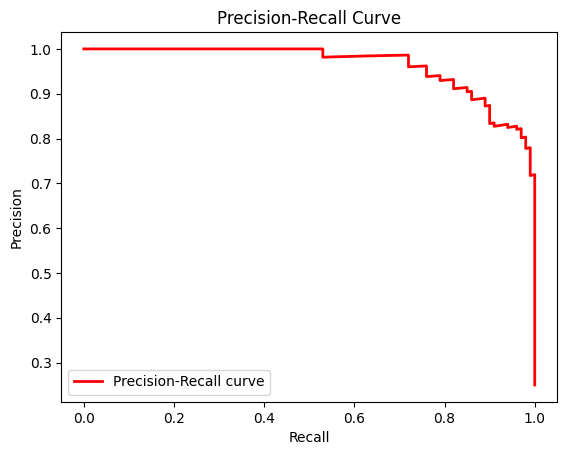

Classification Model Completed & Saved.


In [2]:
# Load dataset
df = pd.read_excel('/content/phone-dataset.xlsx')

# Display dataset information
display(df.head())
display(df.info())

# Encode target variable
label_encoder = LabelEncoder()
df['price_range'] = label_encoder.fit_transform(df['price_range'])

# Define features and target
X = df.drop(columns=['price_range'])
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setup TensorBoard logging
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Build deep learning model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with TensorBoard logging
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])

# Evaluate model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
display(pd.DataFrame(report).transpose())

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs[:, 1], pos_label=1)
plt.figure()
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Save model
model.save('phone_price_classification_model.h5')
print("Classification Model Completed & Saved.")
